# clustering

* Methods covered in this notebook:
* K-means clustering
* Mini-batch k-means clustering
* Spectral clustering
* t-Distributed Stochastic Neighbor Embedding (tSNE)

In [2]:
# import packages

import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('seaborn')

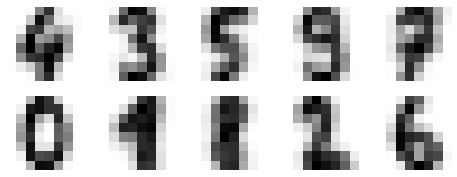

In [4]:
# kmeans on digits data

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

digits = load_digits()
kmeans = KMeans(n_clusters=10)

fig, ax = plt.subplots(2,5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8) # 
for axi, center in zip(ax.flat, centers): # has trouble with 1 and 8
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

0.7935447968836951


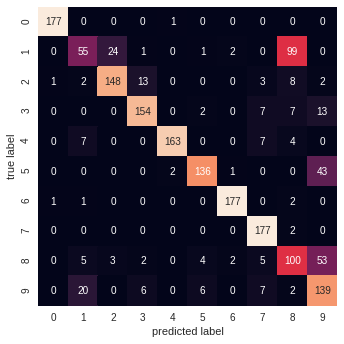

In [7]:
# check accuracy of clusters vs digits.target

# fix order of clusters to be 0-9
from scipy.stats import mode

clusters = kmeans.fit_predict(digits.data)

labels = np.zeros(clusters.shape)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
    
# check accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(digits.target, labels))

# confusion matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, # need to transpose mat!
            xticklabels=digits.target_names, yticklabels = digits.target_names)
plt.xlabel('predicted label')
plt.ylabel('true label');

In [11]:
# preprocess data using TSNE first

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random')
digits_proj = tsne.fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

labels = np.zeros(clusters.shape)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]
    
accuracy_score(digits.target, labels)

0.9415692821368948

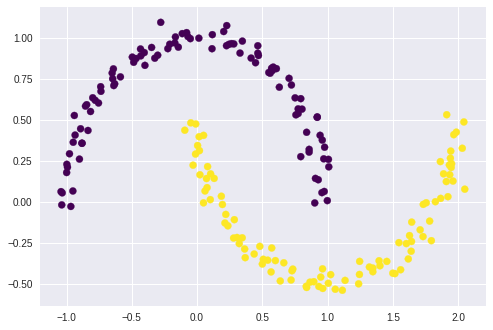

In [10]:
# spectral clustering
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=0.05)
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels,s=50,cmap='viridis');

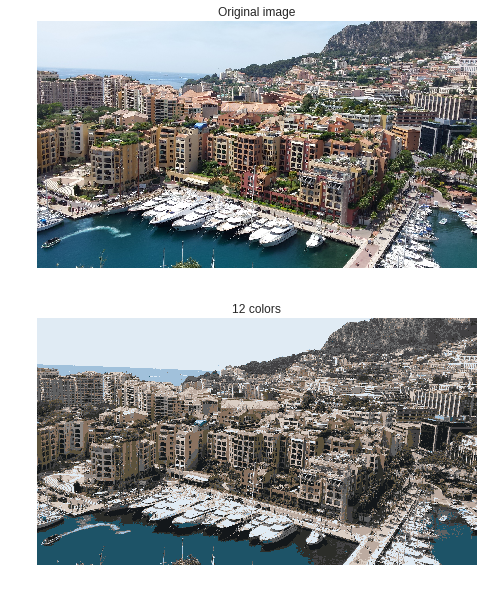

In [12]:
# image processing using mini-batch kmeans

from sklearn.cluster import MiniBatchKMeans

from matplotlib.image import imread
myimg = imread("monaco.png")
X = (myimg).reshape(-1, 3)
n_colors = 12
kmeans = MiniBatchKMeans(n_colors)
labels = kmeans.fit_predict(X)
colors = kmeans.cluster_centers_
new_image = colors[labels].reshape(myimg.shape)
new_image = (255 * new_image).astype(np.uint8)

# plots

fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,1,1)
plt.imshow(myimg)
plt.grid=False
plt.title('Original image'); plt.axis('off')

fig.add_subplot(2,1,2)
plt.imshow(new_image)
plt.title('{} colors'.format(n_colors)); plt.axis('off');

In [17]:
SpectralClustering?